# 4a)

From starter code for plotting clusters

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pylab as py
import time

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
   
def show_clusters(kmeans,X):
    y=kmeans.predict(X)
    fig=py.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(X[:,0],X[:,1],'o',color='blue')
    for i in range(2):
        ec=[0.,0.,0.,1.]
        ec[i]=1.
        ax.plot(X[y==i,0],X[y==i,1],'o',markerfacecolor=(1.,1.,1.,0), markeredgecolor=ec,markersize=10)
    ax.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'o',color='black',markersize=15)
    py.show()

We sample according to the specification and do an initial simple plot of the data

In [23]:
import matplotlib.pyplot as plt
def show_data(X):
    plt.plot([x[0] for x in X], [x[1] for x in X], 'o', alpha=0.5, markersize=10)
    plt.show()

data = np.random.multivariate_normal(
    mean=(0,0),
    cov=((1,0),(0,1)),
    size=1000,
)
show_data(data)

We eyeball some initial clusters and manually cluster the points by calculating the distance for a given point to each cluster center. This allows us to assign each point to a cluster and then plot all the points with the respective coloring.

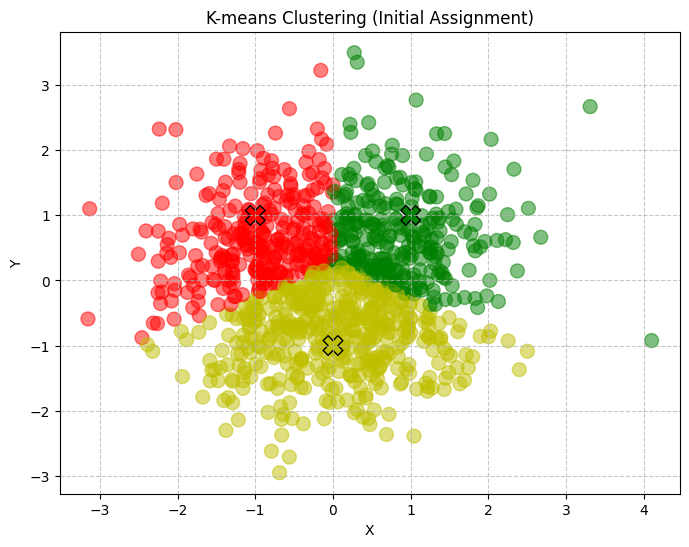

In [30]:
# Initial centers
init_centers = [
    [-1, 1],
    [1, 1],
    [0, -1],
]

# Color choices for the clusters
color_choices = ['r', 'g', 'y']

X = data
colors = []

# Assign each point to the nearest center
for i, point in enumerate(X):
    distances = [(center[0] - point[0])**2 + (center[1] - point[1])**2 for center in init_centers]
    colors.append(color_choices[distances.index(min(distances))])

# Create a figure and plot the data points
plt.figure(figsize=(8, 6))
plt.scatter([x[0] for x in X], [x[1] for x in X], c=colors, alpha=0.5, s=100)

# Plot the centers with a different marker
centers_x = [center[0] for center in init_centers]
centers_y = [center[1] for center in init_centers]
plt.scatter(centers_x, centers_y, c=color_choices, marker='X', s=200, edgecolors='k')

# Add labels and a title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering (Initial Assignment)')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# 4b)

We fit a k-means model with 3 clusters to the data and plot the data points with the color of their cluster. We also display the cluster centers with Xs.

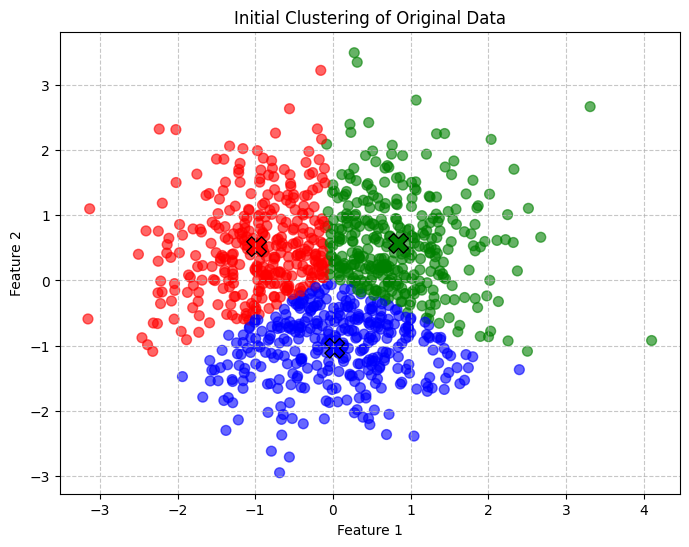

In [34]:
def plot_clusters(data, kmeans, title):
    # Get cluster assignments and centers
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    # Create a colormap for the clusters
    colors = ['r', 'g', 'b']
    cluster_colors = [colors[label] for label in labels]
    
    # Plot the data points colored by cluster
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=cluster_colors, alpha=0.6, s=50)
    
    # Plot the cluster centers
    plt.scatter(centers[:, 0], centers[:, 1], c=colors, marker='X', s=200, edgecolors='k')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    
    return labels, centers

# Fit initial KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)
initial_labels, initial_centers = plot_clusters(data, kmeans, "Initial Clustering of Original Data")

# 4c)

We implement the specified formula, moving each point in the data 1% cluster to its assigned cluster center by doing $x_i=0.99 \cdot x_i + 0.01 c_i$.

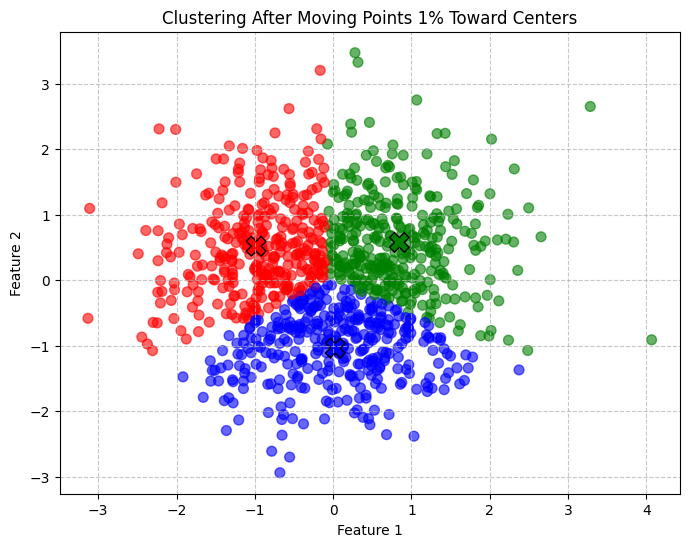

In [38]:
def move_points_toward_centers(data, labels, centers):
    modified_data = data.copy()
    for i in range(len(data)):
        center_idx = labels[i]
        modified_data[i] = 0.99 * data[i] + 0.01 * centers[center_idx]
    return modified_data

# Modify the data
original_data = data.copy()
modified_data = move_points_toward_centers(data, initial_labels, initial_centers)

# Re-cluster the modified data
kmeans_modified = KMeans(n_clusters=3, random_state=42)
kmeans_modified.fit(modified_data)
modified_labels, modified_centers = plot_clusters(modified_data, kmeans_modified, "Clustering After Moving Points 1% Toward Centers")

# 4d)

We run the above process 50 times, iteratively moving the points toward their centers (refitting the cluster centers at each iteration) and then plot the original and final data and clusterings.

Completed week 10
Completed week 20
Completed week 30
Completed week 40
Completed week 50


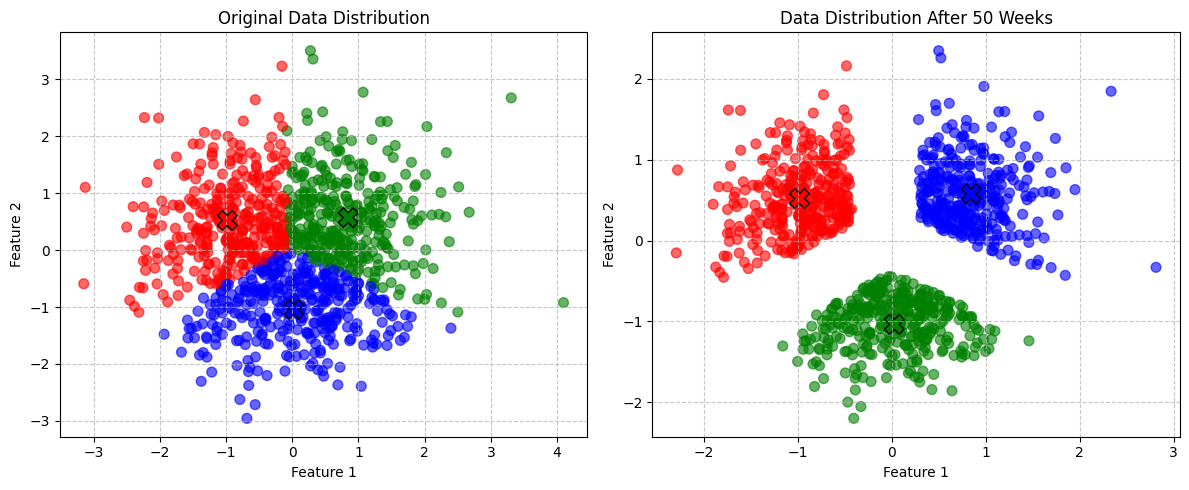

In [39]:
import matplotlib.gridspec as gridspec

current_data = data.copy()
for week in range(50):
    # Fit KMeans to current data
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(current_data)
    current_labels = kmeans.labels_
    current_centers = kmeans.cluster_centers_
    
    # Move points toward their assigned centers
    current_data = move_points_toward_centers(current_data, current_labels, current_centers)
    
    # Optional: print progress every 10 weeks
    if (week + 1) % 10 == 0:
        print(f"Completed week {week + 1}")

# Compare original and final data distributions
plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 2)

# Plot original data
ax1 = plt.subplot(gs[0, 0])
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_original.fit(original_data)
original_labels = kmeans_original.labels_
original_centers = kmeans_original.cluster_centers_

colors = ['r', 'g', 'b']
original_colors = [colors[label] for label in original_labels]
ax1.scatter(original_data[:, 0], original_data[:, 1], c=original_colors, alpha=0.6, s=50)
ax1.scatter(original_centers[:, 0], original_centers[:, 1], 
           c=colors, marker='X', s=200, edgecolors='k')
ax1.set_title("Original Data Distribution")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot final data
ax2 = plt.subplot(gs[0, 1])
kmeans_final = KMeans(n_clusters=3, random_state=42)
kmeans_final.fit(current_data)
final_labels = kmeans_final.labels_
final_centers = kmeans_final.cluster_centers_

final_colors = [colors[label] for label in final_labels]
ax2.scatter(current_data[:, 0], current_data[:, 1], c=final_colors, alpha=0.6, s=50)
ax2.scatter(final_centers[:, 0], final_centers[:, 1], 
           c=colors, marker='X', s=200, edgecolors='k')
ax2.set_title("Data Distribution After 50 Weeks")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 5a)

In [40]:
# Load the data
import json
speeches = []
with open("data/speeches.json") as f:
    for line in f:
        speeches.append(json.loads(line))

We parse out each sentence, using a regex pattern to look for periods, question marks, or exclamation points followed by spaces and capital letters or periods at the end of a paragraph. We explicitly avoid abbreviations like Mr. or U.S.

In [44]:
import re
def parse_sentences(speech_text):
    pattern = r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|!)(\s|[A-Z]|\n|$)'
    sentences = re.split(pattern, speech_text)
    
    cleaned_sentences = []
    for s in sentences:
        if s and not s.isspace() and len(s.strip()) > 0:
            # Remove extra whitespace
            cleaned = re.sub(r'\s+', ' ', s.strip())
            if len(cleaned) > 0:
                cleaned_sentences.append(cleaned)
    
    return cleaned_sentences

# 5b)

Count the words in a given sentence for splitting on whitespace

In [42]:
def count_words(sentence):
    # Split by whitespace and count non-empty strings
    words = [word for word in re.split(r'\s+', sentence) if word]
    return len(words)

We loop through the speeches and compile basic statistics and record the shortest/longest sentences

In [46]:
def analyze_speeches(speeches):
    results = []
    
    for speech in speeches:
        year = speech.get('year', None)
        president = speech.get('president', None)
        text = speech.get('text', '')
        
        if not year or not president or not text:
            continue
            
        sentences = parse_sentences(text)
        sentence_lengths = [count_words(sentence) for sentence in sentences]
        
        if not sentence_lengths:
            continue
            
        # Find shortest and longest sentences
        shortest_idx = np.argmin(sentence_lengths)
        longest_idx = np.argmax(sentence_lengths)
        
        speech_data = {
            'year': int(year),
            'president': president,
            'num_sentences': len(sentences),
            'sentence_lengths': sentence_lengths,
            'avg_sentence_length': np.mean(sentence_lengths),
            'total_words': sum(sentence_lengths),
            'shortest_sentence': sentences[shortest_idx],
            'shortest_length': sentence_lengths[shortest_idx],
            'longest_sentence': sentences[longest_idx],
            'longest_length': sentence_lengths[longest_idx]
        }
        
        results.append(speech_data)
    
    return results

speech_analysis = analyze_speeches(speeches)

Loop through the analyzed speeches to group by presidents instead and then compile basic statistics + shortest/longest by president

In [50]:
from collections import defaultdict
def analyze_presidents(speech_analysis):
    president_sentences = defaultdict(list)
    
    for speech in speech_analysis:
        president = speech['president']
        president_sentences[president].extend(speech['sentence_lengths'])
    
    president_stats = {}
    for president, sentences in president_sentences.items():
        president_stats[president] = {
            'mean': np.mean(sentences),
            'median': np.median(sentences),
            'q25': np.percentile(sentences, 25),
            'q75': np.percentile(sentences, 75),
            'num_sentences': len(sentences)
        }
    
    # Find presidents with shortest and longest average sentences
    presidents = list(president_stats.keys())
    avg_lengths = [president_stats[p]['mean'] for p in presidents]
    
    shortest_president = presidents[np.argmin(avg_lengths)]
    longest_president = presidents[np.argmax(avg_lengths)]
    
    # Find overall shortest and longest sentences
    all_sentences = []
    for speech in speech_analysis:
        all_sentences.append((speech['shortest_sentence'], speech['shortest_length'], speech['president'], speech['year']))
        all_sentences.append((speech['longest_sentence'], speech['longest_length'], speech['president'], speech['year']))
    
    shortest_overall = min(all_sentences, key=lambda x: x[1])
    longest_overall = max(all_sentences, key=lambda x: x[1])
    
    return {
        'president_stats': president_stats,
        'shortest_president': shortest_president,
        'longest_president': longest_president,
        'shortest_sentence': shortest_overall,
        'longest_sentence': longest_overall
    }

presidents_analysis = analyze_presidents(speech_analysis)
presidents_analysis

{'president_stats': {'James Monroe': {'mean': 36.50043215211755,
   'median': 31.0,
   'q25': 22.0,
   'q75': 46.0,
   'num_sentences': 1157},
  'William McKinley': {'mean': 32.26183239253148,
   'median': 27.0,
   'q25': 17.0,
   'q75': 41.0,
   'num_sentences': 2303},
  'Dwight D. Eisenhower': {'mean': 21.06167571761055,
   'median': 19.0,
   'q25': 13.0,
   'q75': 27.0,
   'num_sentences': 2578},
  'Calvin Coolidge': {'mean': 21.498959633791095,
   'median': 19.0,
   'q25': 13.0,
   'q75': 27.0,
   'num_sentences': 2403},
  'James Madison': {'mean': 44.20612244897959,
   'median': 39.0,
   'q25': 26.25,
   'q75': 56.0,
   'num_sentences': 490},
  'Grover Cleveland': {'mean': 36.122250970245794,
   'median': 32.0,
   'q25': 22.0,
   'q75': 46.0,
   'num_sentences': 3092},
  'John Quincy Adams': {'mean': 41.366800535475235,
   'median': 36.0,
   'q25': 24.0,
   'q75': 53.0,
   'num_sentences': 747},
  'Theodore Roosevelt': {'mean': 31.341716566866268,
   'median': 28.0,
   'q25': 18.0

As we can see from the above output, James Madison has the longest sentences on average, George Bush has the shortest on average. We also calculate the mean, median, 25% quantile, and 75% quantile for each president. The longest and shortest sentences ever spoken in a SOU are by Chester Arthur and William McKinley respectively (though it seems my regex parsing may have missed a case for the shortest sentence). 

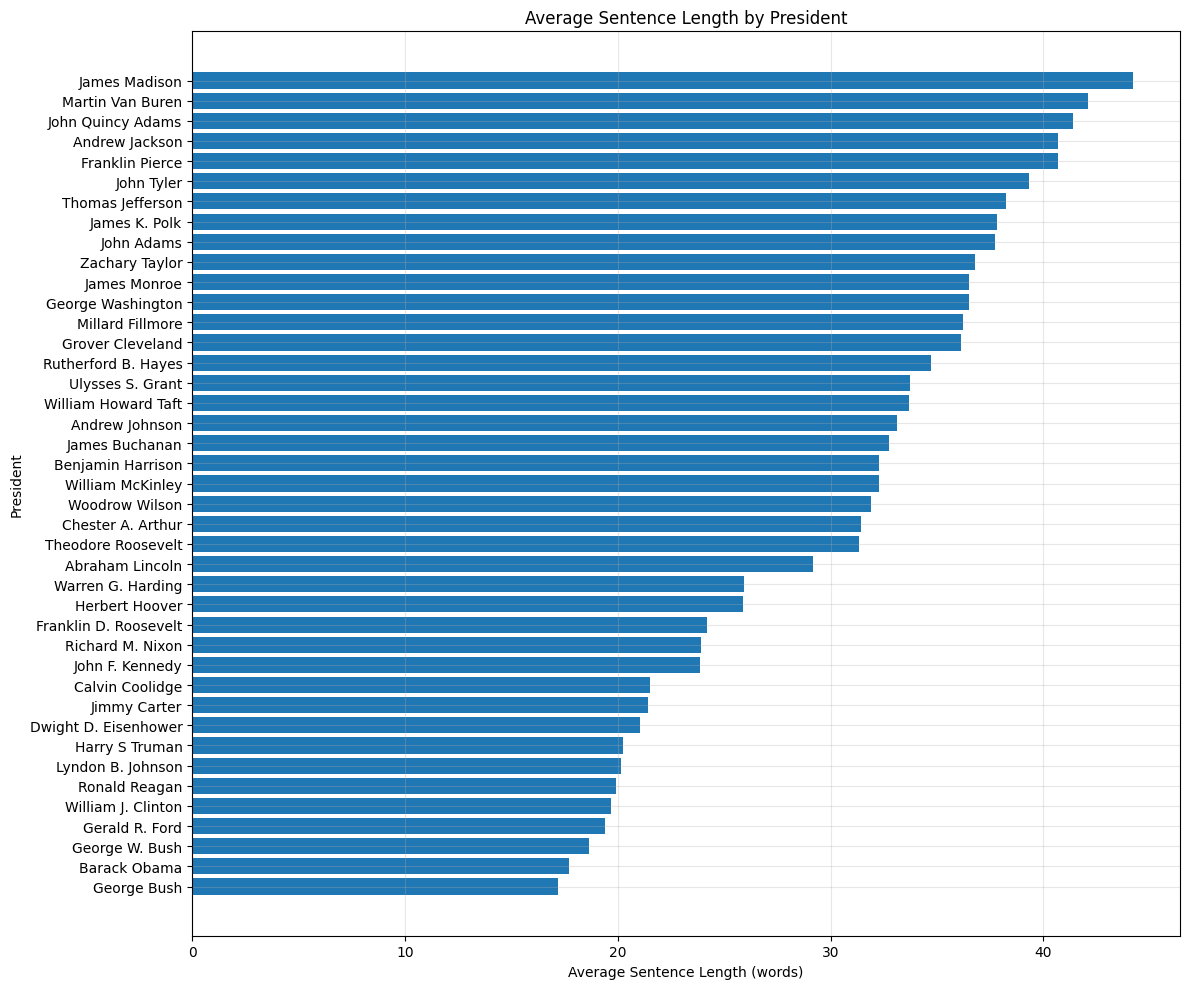

In [58]:
# Plot distribution of sentence lengths by president by sorting on the mean sentence length
def plot_president_stats(president_stats):
    presidents = list(president_stats['president_stats'].keys())
    means = [president_stats['president_stats'][p]['mean'] for p in presidents]
    
    # Sort by mean sentence length
    sorted_indices = np.argsort(means)
    sorted_presidents = [presidents[i] for i in sorted_indices]
    sorted_means = [means[i] for i in sorted_indices]
    
    plt.figure(figsize=(12, 10))
    plt.barh(sorted_presidents, sorted_means)
    plt.xlabel('Average Sentence Length (words)')
    plt.ylabel('President')
    plt.title('Average Sentence Length by President')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
plot_president_stats(presidents_analysis)

# 5c)

In [52]:
def analyze_trends(speech_analysis):
    years = [speech['year'] for speech in speech_analysis]
    num_sentences = [speech['num_sentences'] for speech in speech_analysis]
    avg_lengths = [speech['avg_sentence_length'] for speech in speech_analysis]
    total_words = [speech['total_words'] for speech in speech_analysis]
    
    # Linear regression for number of sentences vs year
    X_sentences = np.vstack([np.ones(len(years)), years]).T
    y_sentences = np.array(num_sentences)
    beta_sentences = np.linalg.solve(X_sentences.T @ X_sentences, X_sentences.T @ y_sentences)
    
    # Linear regression for average sentence length vs year
    X_lengths = np.vstack([np.ones(len(years)), years]).T
    y_lengths = np.array(avg_lengths)
    beta_lengths = np.linalg.solve(X_lengths.T @ X_lengths, X_lengths.T @ y_lengths)
    
    return {
        'years': years,
        'num_sentences': num_sentences,
        'avg_lengths': avg_lengths,
        'total_words': total_words,
        'beta_sentences': beta_sentences,
        'beta_lengths': beta_lengths
    }
trend_results = analyze_trends(speech_analysis)

print("\nRegression for number of sentences vs year:")
print(f"Intercept: {trend_results['beta_sentences'][0]:.2f}")
print(f"Slope: {trend_results['beta_sentences'][1]:.2f} sentences per year")

print("\nRegression for average sentence length vs year:")
print(f"Intercept: {trend_results['beta_lengths'][0]:.2f}")
print(f"Slope: {trend_results['beta_lengths'][1]:.2f} words per year")


Regression for number of sentences vs year:
Intercept: -1244.37
Slope: 0.80 sentences per year

Regression for average sentence length vs year:
Intercept: 255.39
Slope: -0.12 words per year


We plot the linear regressions for the number of sentences by year and the average sentence length by year.

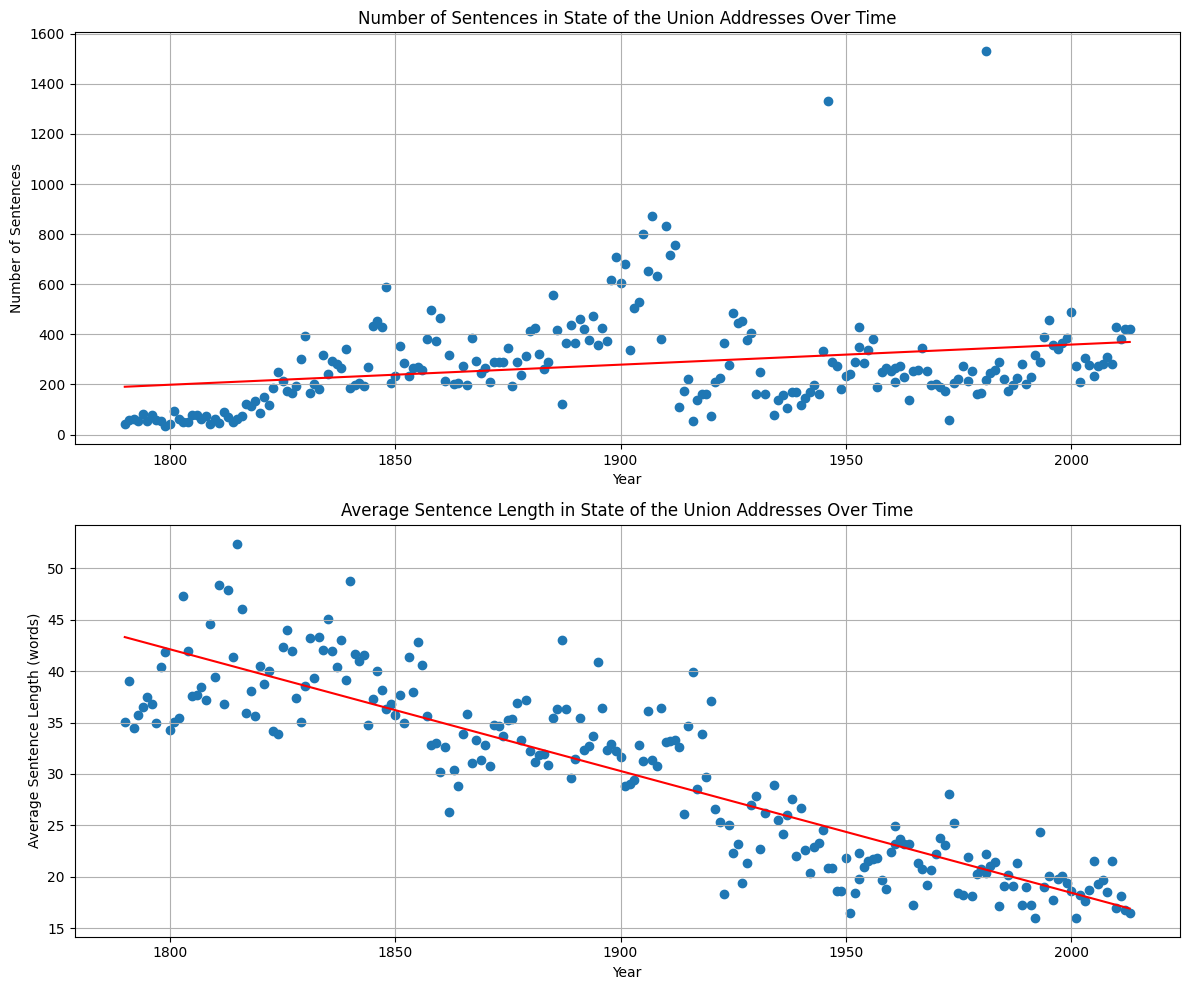


Regression for number of sentences vs year:
Intercept: -1244.37
Slope: 0.80 sentences per year

Regression for average sentence length vs year:
Intercept: 255.39
Slope: -0.12 words per year


In [54]:
def plot_trends(trend_results):
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Plot 1: Number of sentences vs year
    ax1.scatter(trend_results['years'], trend_results['num_sentences'])
    
    # Add regression line
    b0, b1 = trend_results['beta_sentences']
    years_range = np.array([min(trend_results['years']), max(trend_results['years'])])
    ax1.plot(years_range, b0 + b1 * years_range, 'r-')
    
    # Customize plot
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Sentences')
    ax1.set_title('Number of Sentences in State of the Union Addresses Over Time')
    ax1.grid(True)
    
    # Plot 2: Average sentence length vs year
    ax2.scatter(trend_results['years'], trend_results['avg_lengths'])
    
    # Add regression line
    b0, b1 = trend_results['beta_lengths']
    ax2.plot(years_range, b0 + b1 * years_range, 'r-')
    
    # Customize plot
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Average Sentence Length (words)')
    ax2.set_title('Average Sentence Length in State of the Union Addresses Over Time')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Display regression coefficients
    print("\nRegression for number of sentences vs year:")
    print(f"Intercept: {trend_results['beta_sentences'][0]:.2f}")
    print(f"Slope: {trend_results['beta_sentences'][1]:.2f} sentences per year")
    
    print("\nRegression for average sentence length vs year:")
    print(f"Intercept: {trend_results['beta_lengths'][0]:.2f}")
    print(f"Slope: {trend_results['beta_lengths'][1]:.2f} words per year")
plot_trends(trend_results)

In the above plots, we can see a general increase in the number of sentences per year as shown by the positive slope in the linear regression. On the other hand, the regression for average sentence length over the years indicates that the average sentence length has been generally decreasing over time. These trends are perhaps due to broader trends in the usage of English in which average sentence length has been going down (just due to particular phrasings and styles of speaking) and so, perhaps, in order to convey the same amount of information, more sentences are needed in conjunction.

# 5d)

We use a single multiple regression model by using indicator variables and setting up a design matrix that enables different intercepts and slopes for each period. We then fit the model.

In [55]:
def segmented_regression(speech_analysis):
    years = np.array([speech['year'] for speech in speech_analysis])
    total_words = np.array([speech['total_words'] for speech in speech_analysis])
    
    # Create indicator variables for the two periods
    period1 = (years >= 1790) & (years <= 1912)
    period2 = (years >= 1913)
    
    # Design matrix for multiple regression
    X = np.zeros((len(years), 4))
    X[:, 0] = 1  # Intercept for period 1
    X[:, 1] = years * period1  # Slope for period 1
    X[:, 2] = period2  # Intercept for period 2
    X[:, 3] = years * period2  # Slope for period 2
    
    # Fit the model
    beta = np.linalg.solve(X.T @ X, X.T @ total_words)
    
    # Calculate predicted values
    years_range = np.arange(min(years), max(years) + 1)
    period1_range = (years_range >= 1790) & (years_range <= 1912)
    period2_range = (years_range >= 1913)
    
    X_pred = np.zeros((len(years_range), 4))
    X_pred[:, 0] = 1
    X_pred[:, 1] = years_range * period1_range
    X_pred[:, 2] = period2_range
    X_pred[:, 3] = years_range * period2_range
    
    y_pred = X_pred @ beta
    
    return {
        'years': years,
        'total_words': total_words,
        'years_range': years_range,
        'y_pred': y_pred,
        'beta': beta
    }
segmented_results = segmented_regression(speech_analysis)

Similar to previously, we do a scatter plot of the total words vs years and then plot the fitted regression lines from above. We then grab the calculated coefficients for the models and print them as well

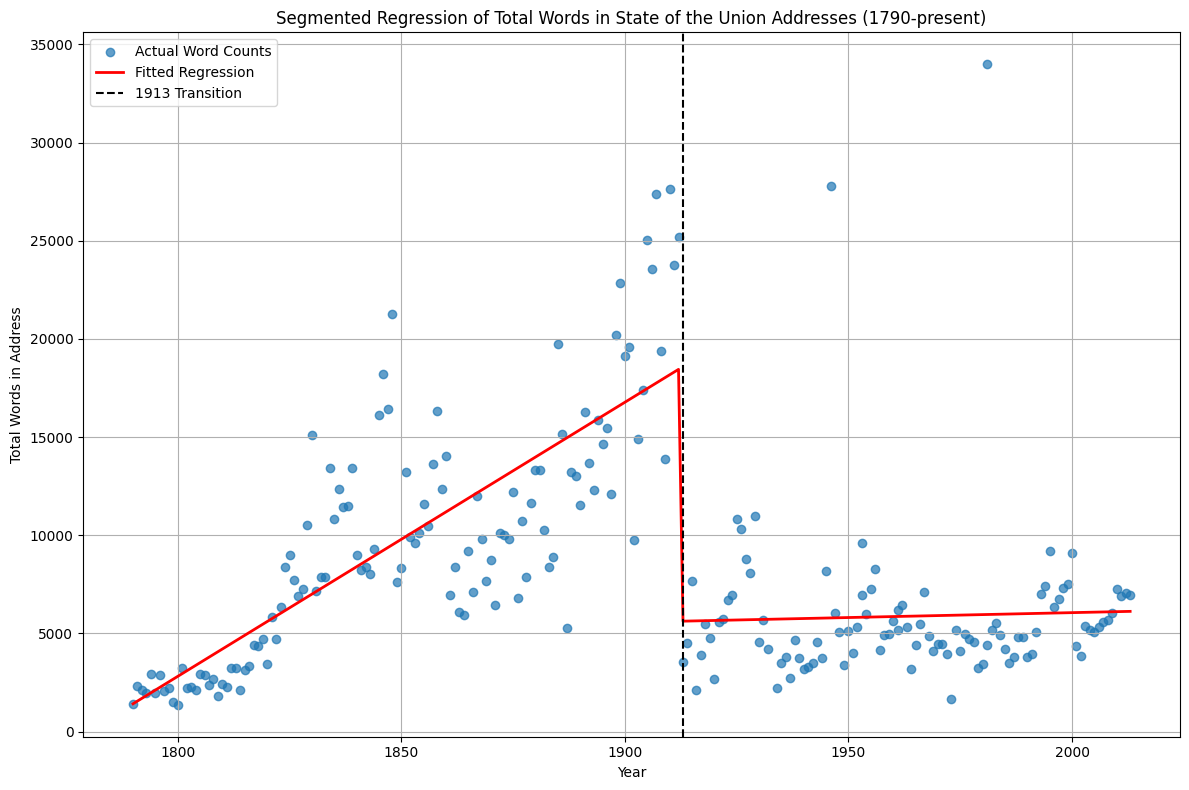


Segmented regression coefficients:
Period 1 (1790-1912) - Intercept: -248437.09
Period 1 (1790-1912) - Slope: 139.58 words per year
Period 2 (1913-present) - Intercept adjustment: 244522.32
Period 2 (1913-present) - Slope: 4.99 words per year

Regression equations:
Period 1 (1790-1912): Words = -248437.09 + 139.58 × Year
Period 2 (1913-present): Words = -3914.77 + 4.99 × Year


In [59]:
def plot_segmented_regression(segmented_results):
    plt.figure(figsize=(12, 8))
    
    # Scatter plot of actual data
    plt.scatter(segmented_results['years'], segmented_results['total_words'], 
                alpha=0.7, label='Actual Word Counts')
    
    # Plot the fitted regression lines
    plt.plot(segmented_results['years_range'], segmented_results['y_pred'], 
             'r-', linewidth=2, label='Fitted Regression')
    
    # Add vertical line at 1913
    plt.axvline(x=1913, color='k', linestyle='--', label='1913 Transition')
    
    # Customize plot
    plt.xlabel('Year')
    plt.ylabel('Total Words in Address')
    plt.title('Segmented Regression of Total Words in State of the Union Addresses (1790-present)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Display the regression coefficients
    print("\nSegmented regression coefficients:")
    print(f"Period 1 (1790-1912) - Intercept: {segmented_results['beta'][0]:.2f}")
    print(f"Period 1 (1790-1912) - Slope: {segmented_results['beta'][1]:.2f} words per year")
    print(f"Period 2 (1913-present) - Intercept adjustment: {segmented_results['beta'][2]:.2f}")
    print(f"Period 2 (1913-present) - Slope: {segmented_results['beta'][3]:.2f} words per year")
    
    # Calculate the actual equations for both periods
    b0_p1, b1_p1, b0_adj_p2, b1_p2 = segmented_results['beta']
    b0_p2 = b0_p1 + b0_adj_p2  # Adjusted intercept for period 2
    
    print("\nRegression equations:")
    print(f"Period 1 (1790-1912): Words = {b0_p1:.2f} + {b1_p1:.2f} × Year")
    print(f"Period 2 (1913-present): Words = {b0_p2:.2f} + {b1_p2:.2f} × Year")

plot_segmented_regression(segmented_results)

i. 

I set up the multiple regression model by creating a design matrix with four columns:
- an intercept for the first period
- year values for the first period
- indicator for the second period
- year values for the second period
This setup allows us to estimate two separate lines with potentially different slopes and intercepts.

ii.
Using a multiple regression as opposed to two separate regressions allows us to have a single unified model rather than two disconnected models, which means that we can consider all the data and predictors simultaneously to estimate the parameters. In particular, this approach makes sense when we think there are relationships between the variables that are consistent across the time periods. Another benefit is that it's easier to interpret and compare the coefficients in this case.

iii. 
We see a general upwards trend in the first period and then a dramatic change starting in 1913. In particular, in the second period, there is a much smaller upwards trend (if there is any at all) and the total number of words has decreased significantly from before. It appears that this change may be due to a format change -- before 1913, many SOUs were written items delivered to Congress, but starting in 1913, presidents started orally delivering the SOUs as speeches to Congress, which would have naturally changed their length and structure. 